In [55]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [56]:
!wget https://gist.github.com/mbejda/7f86ca901fe41bc14a63/archive/38adb475c14a3f44df9999c1541f3a72f472b30d.zip
!unzip 38adb475c14a3f44df9999c1541f3a72f472b30d.zip
import pandas as pd
file_path = '/content/7f86ca901fe41bc14a63-38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv'
df = pd.read_csv(file_path)
names = df['name']
output_file = 'names.txt'
names.to_csv(output_file, index=False, header=False)

--2024-06-01 19:59:14--  https://gist.github.com/mbejda/7f86ca901fe41bc14a63/archive/38adb475c14a3f44df9999c1541f3a72f472b30d.zip
Resolving gist.github.com (gist.github.com)... 20.27.177.113
Connecting to gist.github.com (gist.github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/7f86ca901fe41bc14a63/zip/38adb475c14a3f44df9999c1541f3a72f472b30d [following]
--2024-06-01 19:59:14--  https://codeload.github.com/gist/7f86ca901fe41bc14a63/zip/38adb475c14a3f44df9999c1541f3a72f472b30d
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘38adb475c14a3f44df9999c1541f3a72f472b30d.zip.1’

38adb475c14a3f44df9     [ <=>                ]  68.09K  --.-KB/s    in 0.1s    

2024-06-01 19:59:15 (713 KB/s) - ‘38adb475c14a3f

In [57]:
alphabets = set("abcdefghijklmnopqrstuvwxyz")
words=open('names.txt','r').read().splitlines()
words = [name for name in words if all(char in alphabets for char in name.lower())]
words[0]="samyak"
words[:8]

['samyak', 'amit', 'kushal', 'kasid', 'sanjay', 'abhi', 'chanderpal', 'aman']

In [58]:
len(words)

6429

In [59]:
chars=sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [60]:
block_size=3

X,Y=[],[]

for w in words[:5]:
  print(w)
  context=[0]*block_size
  for ch in w+ '.':
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context),'--->', itos[ix])
    context=context[1:]+[ix]
X=torch.tensor(X)
Y=torch.tensor(Y)

samyak
... ---> s
..s ---> a
.sa ---> m
sam ---> y
amy ---> a
mya ---> k
yak ---> .
amit
... ---> a
..a ---> m
.am ---> i
ami ---> t
mit ---> .
kushal
... ---> k
..k ---> u
.ku ---> s
kus ---> h
ush ---> a
sha ---> l
hal ---> .
kasid
... ---> k
..k ---> a
.ka ---> s
kas ---> i
asi ---> d
sid ---> .
sanjay
... ---> s
..s ---> a
.sa ---> n
san ---> j
anj ---> a
nja ---> y
jay ---> .


In [61]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [62]:
X

tensor([[ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19,  1],
        [19,  1, 13],
        [ 1, 13, 25],
        [13, 25,  1],
        [25,  1, 11],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 13],
        [ 1, 13,  9],
        [13,  9, 20],
        [ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11, 21],
        [11, 21, 19],
        [21, 19,  8],
        [19,  8,  1],
        [ 8,  1, 12],
        [ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11,  1],
        [11,  1, 19],
        [ 1, 19,  9],
        [19,  9,  4],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19,  1],
        [19,  1, 14],
        [ 1, 14, 10],
        [14, 10,  1],
        [10,  1, 25]])

In [63]:
C=torch.randn((27,2))

In [64]:
C.shape

torch.Size([27, 2])

In [65]:
C[:5]

tensor([[ 0.6570, -0.7407],
        [ 0.7721,  0.4242],
        [-0.6257, -1.9213],
        [-0.0066, -1.2138],
        [ 1.8262, -0.2444]])

In [66]:
X.shape

torch.Size([32, 3])

In [67]:
C[5]

tensor([-0.9339, -1.4274])

In [68]:
C[X].shape

torch.Size([32, 3, 2])

In [69]:
X[13,2]

tensor(11)

In [70]:
C[11]

tensor([ 1.5555, -2.5021])

In [71]:
C[X][13]

tensor([[ 0.6570, -0.7407],
        [ 0.6570, -0.7407],
        [ 1.5555, -2.5021]])

In [72]:
C[X][13,2]

tensor([ 1.5555, -2.5021])

In [73]:
C[11]

tensor([ 1.5555, -2.5021])

In [74]:
C[X][1]

tensor([[ 0.6570, -0.7407],
        [ 0.6570, -0.7407],
        [-0.7610, -0.2370]])

In [75]:
X[1]

tensor([ 0,  0, 19])

In [76]:
C[X].shape

torch.Size([32, 3, 2])

In [77]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [78]:
W1=torch.randn((6,100))
b1=torch.randn(100)

In [79]:
emb[1]

tensor([[ 0.6570, -0.7407],
        [ 0.6570, -0.7407],
        [-0.7610, -0.2370]])

In [80]:
emb.shape

torch.Size([32, 3, 2])

In [81]:
h=torch.tanh(emb.view(-1,6) @ W1 +b1)
h

tensor([[-0.9611,  0.9961,  0.9714,  ...,  0.9923,  0.7413,  0.9974],
        [-0.9949,  0.9531,  0.8612,  ...,  0.6906,  0.7488,  0.9997],
        [-0.7408, -0.6265, -0.6441,  ...,  0.4002, -0.8105,  0.9275],
        ...,
        [-0.9887,  0.9583,  0.9959,  ..., -0.5827,  0.0818,  1.0000],
        [-0.6656, -0.9447, -0.9162,  ...,  0.9264, -0.8326,  0.7444],
        [-0.6574,  0.9636, -0.9133,  ..., -0.9909,  0.9293,  0.9958]])

In [82]:
h.shape

torch.Size([32, 100])

In [83]:
W2=torch.randn(100,27)
b2=torch.randn(27)

In [84]:
logits=h @ W2+ b2

In [85]:
logits.shape

torch.Size([32, 27])

In [86]:
logits[1]

tensor([ -2.2030,   6.5442,   4.0684,  22.6034,   4.0605,   2.0029,   3.2578,
         -3.0420,  -0.6791,  -0.6279,  10.2855,   4.8077, -20.2900,   7.6902,
         -9.3111,  -3.1745,   4.7012,   3.9697,   8.5404,   4.8490,  -1.5082,
          9.7737,   5.9257,  -5.8836,   5.4724,  -7.6605,   1.5928])

In [87]:
counts=logits.exp()

In [88]:
probs=counts/counts.sum(1,keepdims=True)
probs[1]

tensor([1.6855e-11, 1.0607e-07, 8.9201e-09, 9.9999e-01, 8.8497e-09, 1.1306e-09,
        3.9656e-09, 7.2840e-12, 7.7369e-11, 8.1428e-11, 4.4711e-06, 1.8682e-08,
        2.3531e-19, 3.3365e-07, 1.3795e-14, 6.3801e-12, 1.6795e-08, 8.0817e-09,
        7.8080e-07, 1.9471e-08, 3.3764e-11, 2.6799e-06, 5.7144e-08, 4.2490e-13,
        3.6316e-08, 7.1874e-14, 7.5030e-10])

In [89]:
probs[1].sum()

tensor(1.)

In [90]:
loss=-probs[torch.arange(32),Y].log().mean()
loss

tensor(13.0377)

In [91]:
# ----------------- #

In [92]:
# Formatting the data
alphabets = set("abcdefghijklmnopqrstuvwxyz")
words=open('names.txt','r').read().splitlines()
words = [name for name in words if all(char in alphabets for char in name.lower()) and ' ' not in name]
words[0]="samyak"
words = list(set(words))


In [93]:
len(words) #6429 without filtering

2198

In [94]:
# Building the vocabulary of characters and maping to/from integers
chars=sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [95]:
# Building the dataset
def build_dataset(words):
  block_size=3

  X,Y=[],[]

  for w in words:
    # print(w)
    context=[0]*block_size
    for ch in w+ '.':
      ix=stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context),'--->', itos[ix])
      context=context[1:]+[ix]
  X=torch.tensor(X)
  Y=torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

In [96]:
# Dataset
Xtr.shape, Ytr.shape,Xdev.shape, Ydev.shape,Xte.shape, Yte.shape

(torch.Size([13407, 3]),
 torch.Size([13407]),
 torch.Size([1719, 3]),
 torch.Size([1719]),
 torch.Size([1679, 3]),
 torch.Size([1679]))

In [97]:
# Hyperparameter for the model
embedding_input=6
emb_input=3*embedding_input
neurons=32
# ----

g=torch.Generator().manual_seed(19)
C=torch.randn((27,embedding_input),generator=g)
W1=torch.randn((emb_input,neurons),generator=g)
b1=torch.randn(neurons,generator=g)
W2=torch.randn((neurons,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [98]:
total_elements=0
for p in parameters:
    total_elements += p.nelement()

print(total_elements)

1661


In [99]:
for p in parameters:
  p.requires_grad=True

In [100]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [101]:
lri=[]
stepi=[]
lossi=[]

In [102]:
for i in range(25000):
  # minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # Forward pass
  emb=C[Xtr[ix]]
  h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
  logits=h @W2 +b2
  loss=F.cross_entropy(logits,Ytr[ix])
  # print(loss.item())

  # Backward pass
  for p in parameters:
    p.grad=None
  loss.backward()

  # Update
  # lr=lrs[i]
  lr=0.01
  for p in parameters:
    p.data+= -lr*p.grad

  # Track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())


2.0377447605133057


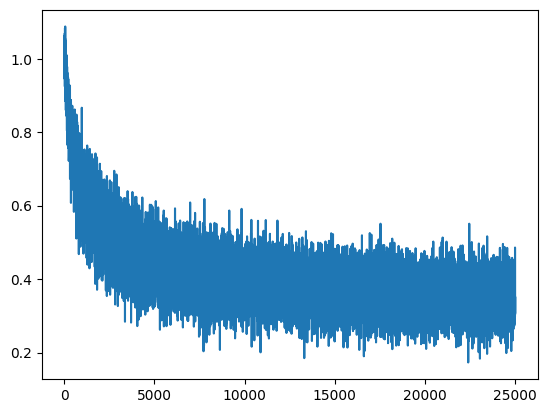

In [103]:
# plt.plot(lri,lossi)
plt.plot(stepi,lossi)

In [104]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
logits=h @W2 +b2
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.3303, grad_fn=<NllLossBackward0>)

In [105]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
logits=h @W2 +b2
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.2535, grad_fn=<NllLossBackward0>)

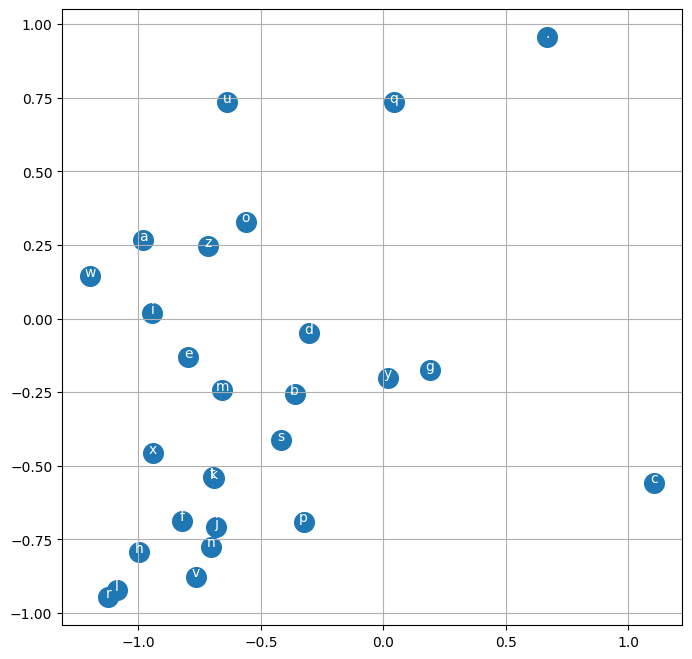

In [106]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",color="white")
  plt.grid('minor')

In [107]:
g=torch.Generator().manual_seed(19)

for _ in range(20):
  out=[]
  context=[0]* block_size
  while True:
    emb=C[torch.tensor([context])]
    h=torch.tanh(emb.view(1,-1) @ W1+b1)
    logits=h @ W2+b2
    probs=F.softmax(logits,dim=1)
    ix=torch.multinomial(probs, num_samples=1, generator=g).item()
    context=context[1:]+[ix]
    out.append(ix)
    if ix==0:
      break
  print(''.join(itos[i] for i in out))

shajithameerardkaratvilshail.
banind.
kutashurilbajsh.
ilt.
puramalsanb.
gahmashuldeshan.
sa.
sanjohh.
vii.
ghari.
kufdir.
jas.
arler.
ches.
hinan.
ramdeniudhumad.
jabler.
puran.
kan.
parkr.


In [109]:
# Formatting the data
path=input('Enter file path :')
alphabets = set("abcdefghijklmnopqrstuvwxyz")
words=open(path,'r').read().splitlines()
words = [name for name in words if all(char in alphabets for char in name.lower()) and ' ' not in name]
# words[0]="samyak"
words = list(set(words))
# Building the vocabulary of characters and maping to/from integers
chars=sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
# Building the dataset
def build_dataset(words):
  block_size=3

  X,Y=[],[]

  for w in words:
    # print(w)
    context=[0]*block_size
    for ch in w+ '.':
      ix=stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context),'--->', itos[ix])
      context=context[1:]+[ix]
  X=torch.tensor(X)
  Y=torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])
# Dataset
Xtr.shape, Ytr.shape,Xdev.shape, Ydev.shape,Xte.shape, Yte.shape
# Hyperparameter for the model
embedding_input=6
emb_input=3*embedding_input
neurons=32
# ----

g=torch.Generator().manual_seed(19)
C=torch.randn((27,embedding_input),generator=g)
W1=torch.randn((emb_input,neurons),generator=g)
b1=torch.randn(neurons,generator=g)
W2=torch.randn((neurons,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]
param=0
for p in parameters:
    param += p.nelement()

print(f'{param=}')

for p in parameters:
  p.requires_grad=True

lre=torch.linspace(-3,0,1000)
lrs=10**lre
lri=[]
stepi=[]
lossi=[]
for i in range(25000):
  # minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # Forward pass
  emb=C[Xtr[ix]]
  h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
  logits=h @W2 +b2
  loss=F.cross_entropy(logits,Ytr[ix])
  # print(loss.item())

  # Backward pass
  for p in parameters:
    p.grad=None
  loss.backward()

  # Update
  # lr=lrs[i]
  lr=0.11
  for p in parameters:
    p.data+= -lr*p.grad

  # Track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(f'loss= {loss.item()}')
emb=C[Xdev]
h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
logits=h @W2 +b2
loss=F.cross_entropy(logits,Ydev)
emb=C[Xtr]
h=torch.tanh(emb.view(-1,emb_input) @ W1 +b1)
logits=h @W2 +b2
loss=F.cross_entropy(logits,Ytr)
g=torch.Generator().manual_seed(19)

num=int(input('how many words do you want to generate ?'))
for _ in range(num):
  out=[]
  context=[0]* block_size
  while True:
    emb=C[torch.tensor([context])]
    h=torch.tanh(emb.view(1,-1) @ W1+b1)
    logits=h @ W2+b2
    probs=F.softmax(logits,dim=1)
    ix=torch.multinomial(probs, num_samples=1, generator=g).item()
    context=context[1:]+[ix]
    out.append(ix)
    if ix==0:
      break
  print(''.join(itos[i] for i in out))

Enter file path :names.txt
param=1661
loss= 1.5886130332946777
how many words do you want to generate ?30
shajit.
rieeral.
karam.
singanjee.
sanw.
kuttshurilal.
saril.
minramalsoidhraj.
bhu.
logem.
sura.
sanjehhrarishupal.
kuf.
shil.
salal.
ramses.
shan.
subadeniul.
pari.
shul.
sal.
shookender.
jrim.
pand.
vakidh.
deyandra.
sharil.
ricdhir.
aat.
chad.
